# Decision Tree

In [107]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [108]:
car_kick = pd.read_csv("car_kick.csv")
car_kick

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,IsBadBuy
0,1289952000,2006,4,51954,6197,7062,9605,10426,5341,6351,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0
1,1242691200,2005,4,89127,3688,4783,4483,5666,3688,4783,...,2,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0
2,1248220800,2006,3,71271,6897,8449,7949,9625,6868,8549,...,1,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0
3,1285718400,2008,2,83338,7878,8925,11723,13026,7801,8704,...,2,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0
4,1237334400,2007,2,58698,8800,10091,10004,11398,7355,8543,...,1,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,1285804800,2008,2,56072,6255,6972,9852,10567,6326,7126,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,22808,77061,TX,0,1
67207,1274918400,2004,6,94232,8359,9645,12042,13302,7505,8188,...,1,Alloy,'TOP LINE ASIAN','MEDIUM SUV',OTHER,17675,28273,NC,0,1
67208,1280448000,2004,6,79534,2805,3826,6132,6871,3106,4479,...,1,Alloy,AMERICAN,MEDIUM,GM,18880,37771,TN,0,1
67209,1285200000,2003,7,79394,4042,5296,7335,8983,3534,4732,...,2,Covers,AMERICAN,'MEDIUM SUV',GM,23657,92337,CA,0,1


In [109]:
# Select the desired columns only
desired_columns = ['Auction', 'Color', 'IsBadBuy', 'MMRCurrentAuctionAveragePrice', 'Size','TopThreeAmericanName',
'VehBCost', 'VehicleAge', 'VehOdo', 'WarrantyCost', 'WheelType']

# Filter DF for columns picked
car_kick_desired = car_kick [desired_columns]

In [110]:
carAuction = car_kick_desired.copy()

# Convert to string first
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('string')

# Replace numbers with words
carAuction.loc[:, 'IsBadBuy'] = carAuction['IsBadBuy'].replace({0: 'No', 1: 'Yes'})

In [111]:
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,MANHEIM,SILVER,0,5341,MEDIUM,CHRYSLER,6500,4,51954,1086,Covers
1,ADESA,SILVER,0,3688,MEDIUM,FORD,3680,4,89127,983,Covers
2,MANHEIM,RED,0,6868,LARGE,GM,7170,3,71271,1974,Alloy
3,MANHEIM,BLACK,0,7801,LARGE,GM,7670,2,83338,2152,Covers
4,ADESA,WHITE,0,7355,LARGE,GM,7165,2,58698,1500,Alloy


In [112]:
carAuction.isnull().sum()

Auction                          0
Color                            0
IsBadBuy                         0
MMRCurrentAuctionAveragePrice    0
Size                             0
TopThreeAmericanName             0
VehBCost                         0
VehicleAge                       0
VehOdo                           0
WarrantyCost                     0
WheelType                        0
dtype: int64

In [113]:
carAuction.dtypes

Auction                                  object
Color                                    object
IsBadBuy                         string[python]
MMRCurrentAuctionAveragePrice             int64
Size                                     object
TopThreeAmericanName                     object
VehBCost                                  int64
VehicleAge                                int64
VehOdo                                    int64
WarrantyCost                              int64
WheelType                                object
dtype: object

In [114]:
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

In [115]:
carAuction.dtypes

Auction                          category
Color                            category
IsBadBuy                         category
MMRCurrentAuctionAveragePrice       int64
Size                             category
TopThreeAmericanName             category
VehBCost                            int64
VehicleAge                          int64
VehOdo                              int64
WarrantyCost                        int64
WheelType                        category
dtype: object

In [116]:
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction.head()

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,...,Size_LARGE,Size_MEDIUM,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special
0,0,5341,6500,4,51954,1086,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,0,3688,3680,4,89127,983,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,0,6868,7170,3,71271,1974,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,0,7801,7670,2,83338,2152,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
4,0,7355,7165,2,58698,1500,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [117]:
y = carAuction['IsBadBuy']
print(y.value_counts(normalize=True) * 100)

IsBadBuy
0    90.453944
1     9.546056
Name: proportion, dtype: float64


In [118]:
x = carAuction.drop(['IsBadBuy'],axis =1)
print(x.columns)


Index(['MMRCurrentAuctionAveragePrice', 'VehBCost', 'VehicleAge', 'VehOdo',
       'WarrantyCost', 'Auction_MANHEIM', 'Auction_OTHER', 'Color_BEIGE',
       'Color_BLACK', 'Color_BLUE', 'Color_BROWN', 'Color_GOLD', 'Color_GREEN',
       'Color_GREY', 'Color_MAROON', 'Color_ORANGE', 'Color_OTHER',
       'Color_PURPLE', 'Color_RED', 'Color_SILVER', 'Color_WHITE',
       'Color_YELLOW', 'Size_'LARGE TRUCK'', 'Size_'MEDIUM SUV'',
       'Size_'SMALL SUV'', 'Size_'SMALL TRUCK'', 'Size_COMPACT',
       'Size_CROSSOVER', 'Size_LARGE', 'Size_MEDIUM', 'Size_SPECIALTY',
       'Size_SPORTS', 'Size_VAN', 'TopThreeAmericanName_FORD',
       'TopThreeAmericanName_GM', 'TopThreeAmericanName_OTHER',
       'WheelType_Covers', 'WheelType_Special'],
      dtype='object')


In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(f'Train %: {x_train.shape[0] / len(x): .0%}')
print(f'Test % : {y_train.shape[0] / len(x): .0%}')
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Train %:  70%
Test % :  70%
(47047, 38) (47047,) (20164, 38) (20164,)


In [120]:
combined_train_df = carAuction.copy()

majority_df = combined_train_df[combined_train_df['IsBadBuy'] == '0']
minority_df = combined_train_df[combined_train_df['IsBadBuy'] == '1']
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)


undersampled_data = pd.concat([undersampled_majority, minority_df])


balanced_data = undersampled_data.sample(frac=1, random_state=5)

predictors_train = balanced_data.drop(columns=['IsBadBuy'])
target_train = balanced_data['IsBadBuy']

In [121]:
balanced_data['IsBadBuy'].value_counts(normalize=True)

IsBadBuy
0    0.5
1    0.5
Name: proportion, dtype: float64

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [123]:
print(y.value_counts(normalize=True) * 100)

IsBadBuy
0    90.453944
1     9.546056
Name: proportion, dtype: float64


In [124]:
model = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

[Text(0.5, 0.875, 'VehicleAge <= 4.5\nentropy = 0.449\nsamples = 47047\nvalue = [42628, 4419]\nclass = No'),
 Text(0.25, 0.625, 'VehicleAge <= 2.5\nentropy = 0.329\nsamples = 28774\nvalue = [27037, 1737]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'VehBCost <= 6377.5\nentropy = 0.219\nsamples = 7521\nvalue = [7257, 264]\nclass = No'),
 Text(0.0625, 0.125, 'entropy = 0.367\nsamples = 980\nvalue = [911, 69]\nclass = No'),
 Text(0.1875, 0.125, 'entropy = 0.193\nsamples = 6541\nvalue = [6346, 195]\nclass = No'),
 Text(0.375, 0.375, 'VehBCost <= 5497.5\nentropy = 0.363\nsamples = 21253\nvalue = [19780.0, 1473.0]\nclass = No'),
 Text(0.3125, 0.125, 'entropy = 0.465\nsamples = 4049\nvalue = [3649, 400]\nclass = No'),
 Text(0.4375, 0.125, 'entropy = 0.337\nsamples = 17204\nvalue = [16131, 1073]\nclass = No'),
 Text(0.75, 0.625, 'VehBCost <= 4962.5\nentropy = 0.602\nsamples = 18273\nvalue = [15591, 2682]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'War

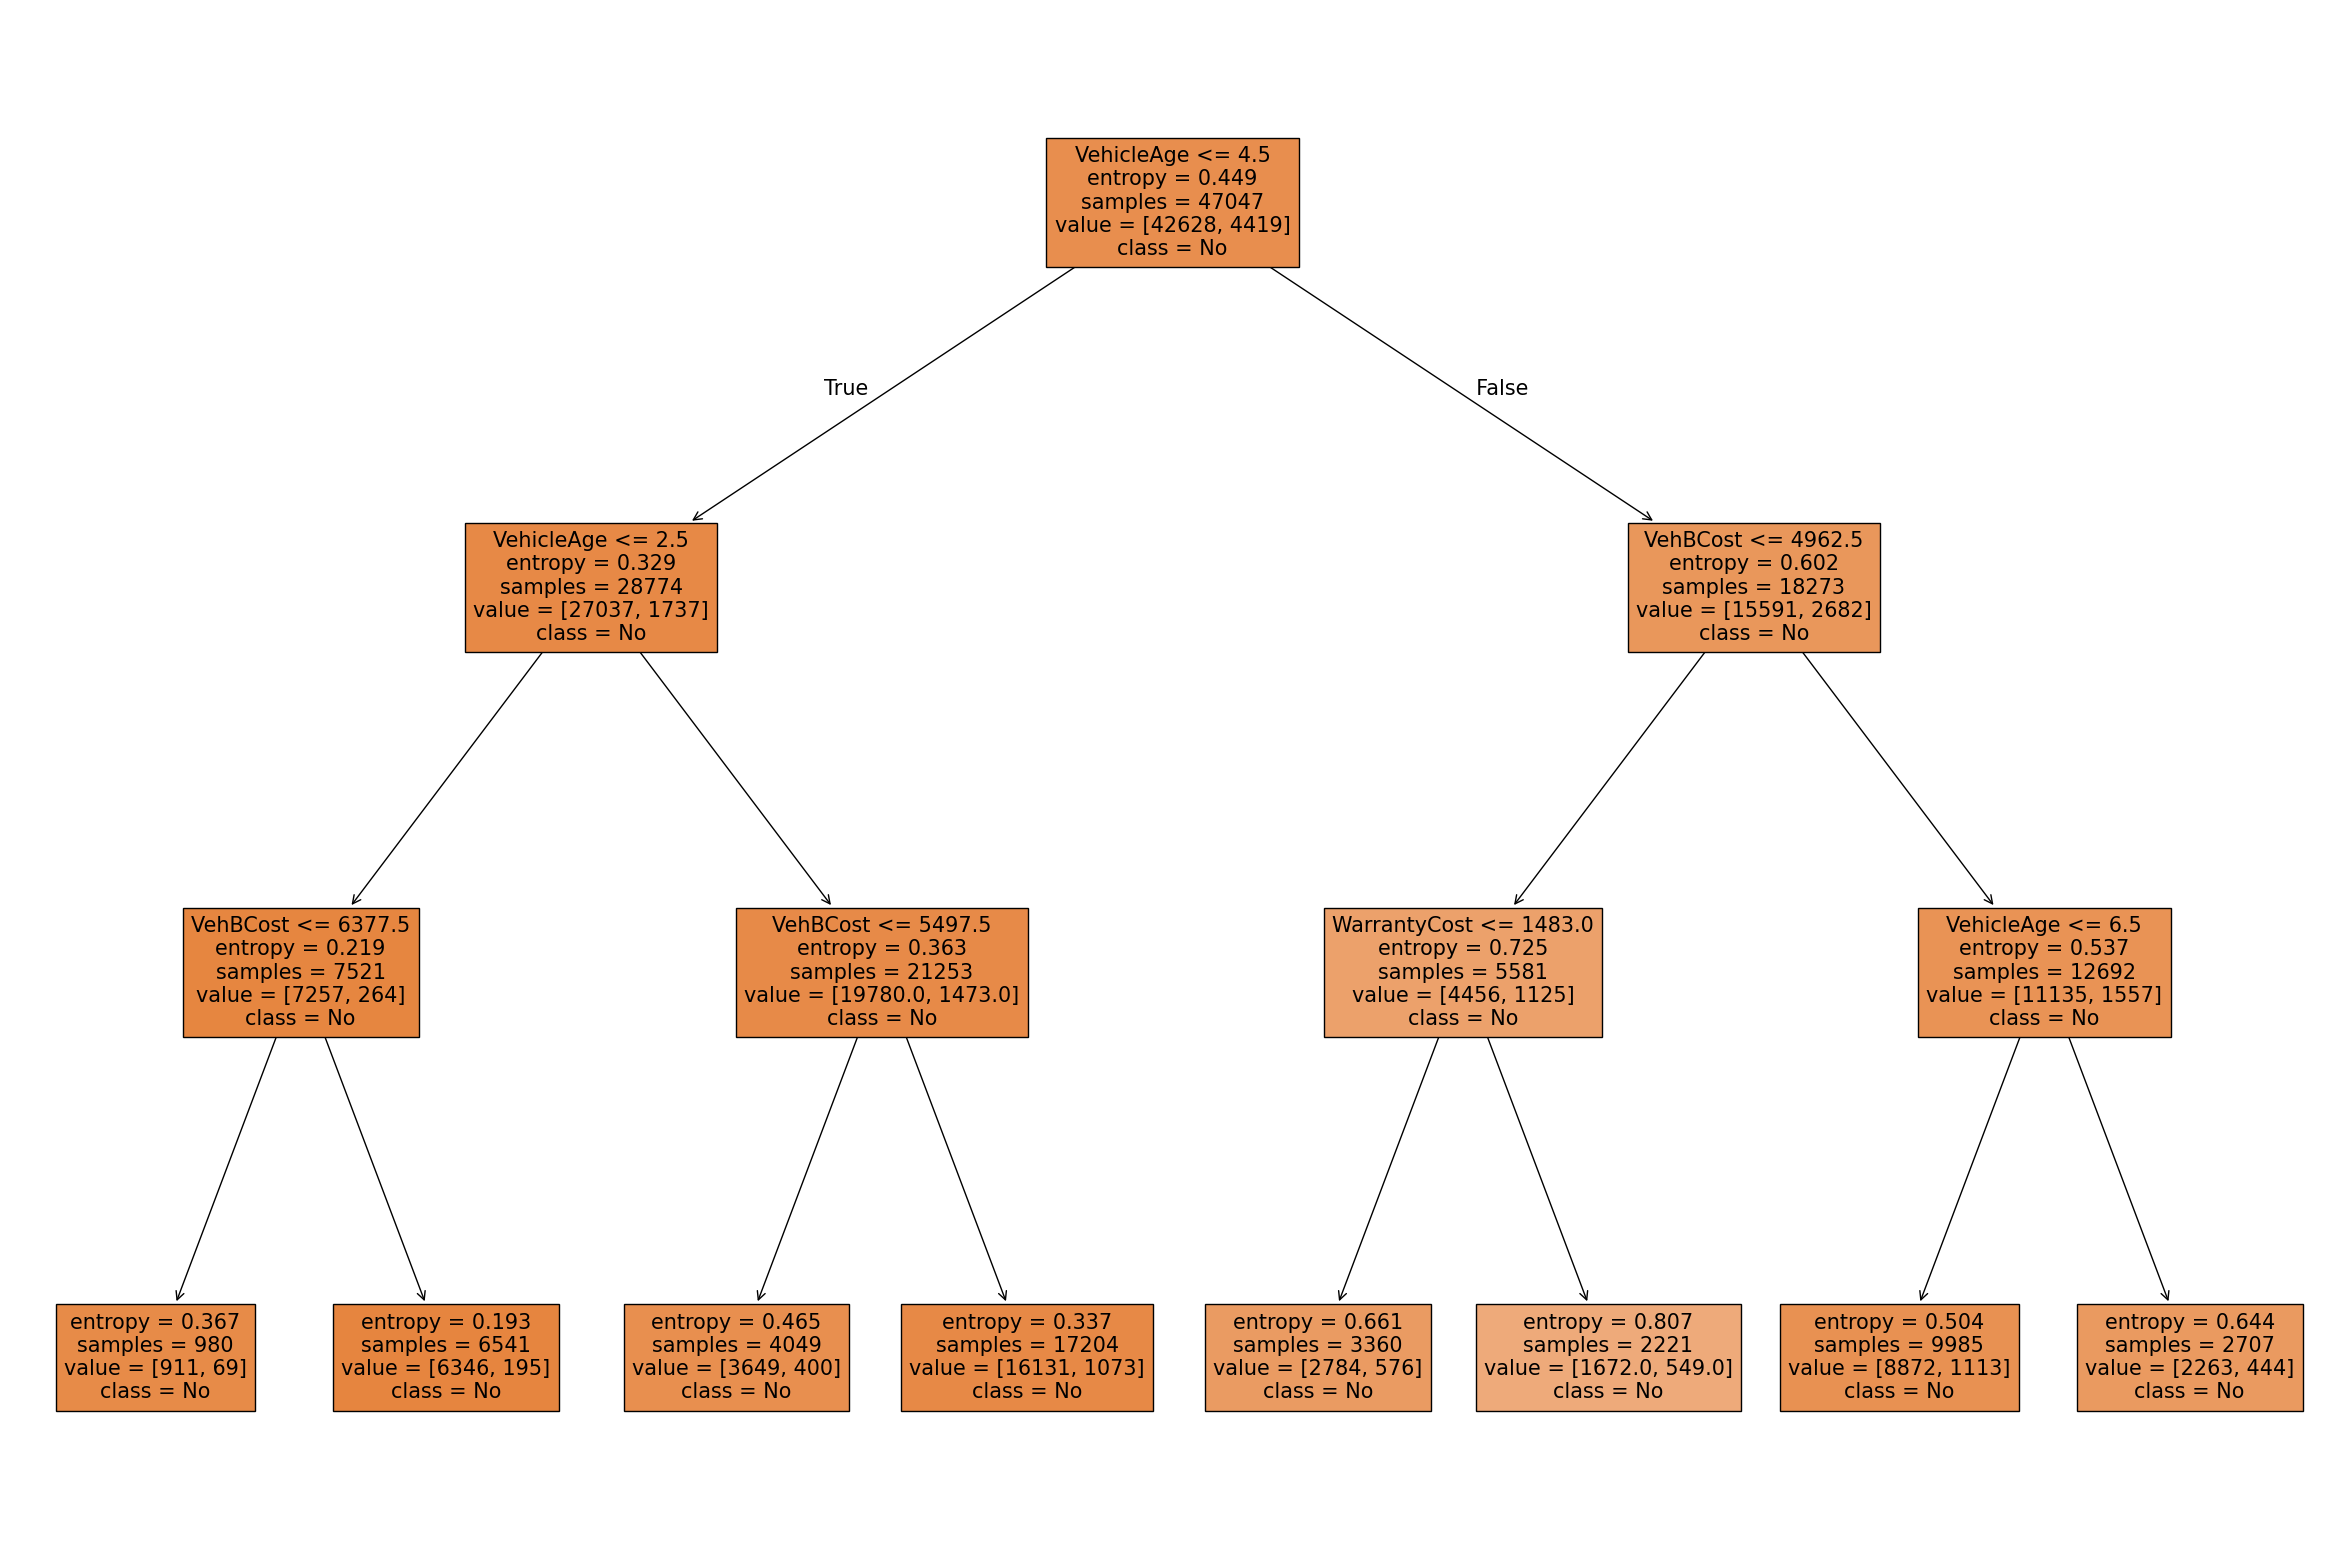

In [125]:
fig = plt.figure(figsize=(30, 20))
tree.plot_tree(model,
               feature_names=list(x.columns),
               class_names=['No', 'Yes'],
               filled=True)

In [126]:
print(tree.export_text(model, feature_names=list(x.columns)))

|--- VehicleAge <= 4.50
|   |--- VehicleAge <= 2.50
|   |   |--- VehBCost <= 6377.50
|   |   |   |--- class: 0
|   |   |--- VehBCost >  6377.50
|   |   |   |--- class: 0
|   |--- VehicleAge >  2.50
|   |   |--- VehBCost <= 5497.50
|   |   |   |--- class: 0
|   |   |--- VehBCost >  5497.50
|   |   |   |--- class: 0
|--- VehicleAge >  4.50
|   |--- VehBCost <= 4962.50
|   |   |--- WarrantyCost <= 1483.00
|   |   |   |--- class: 0
|   |   |--- WarrantyCost >  1483.00
|   |   |   |--- class: 0
|   |--- VehBCost >  4962.50
|   |   |--- VehicleAge <= 6.50
|   |   |   |--- class: 0
|   |   |--- VehicleAge >  6.50
|   |   |   |--- class: 0



In [127]:
prediction_on_test = model.predict(x_test)

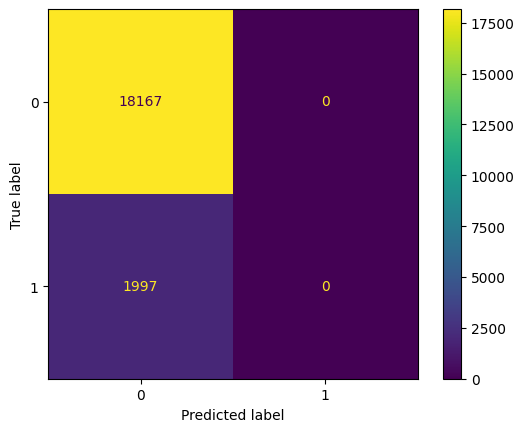

In [129]:

cm = confusion_matrix(y_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [130]:
print(classification_report(y_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     18167
           1       0.00      0.00      0.00      1997

    accuracy                           0.90     20164
   macro avg       0.45      0.50      0.47     20164
weighted avg       0.81      0.90      0.85     20164



c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\drish\anaconda3\envs\elephant3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",